In [1]:
from ROOT import gSystem, gInterpreter, TChain, TH1F, TLorentzVector

# Path of Delphes directory 
# Personal laptop path
gSystem.AddDynamicPath("/home/nayan/MG5_aMC_v2_8_2/Delphes/")
# Cluster path
# ROOT.gSystem.AddDynamicPath("/home/johnson/MG5_aMC_v2_4_3/Delphes/")
gSystem.Load("libDelphes")

gInterpreter.Declare('#include "classes/DelphesClasses.h"')
gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

from ROOT import ExRootTreeReader


Welcome to JupyROOT 6.22/05


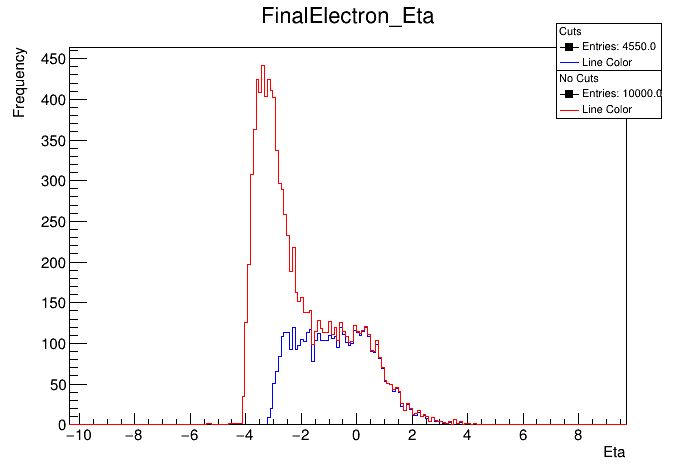

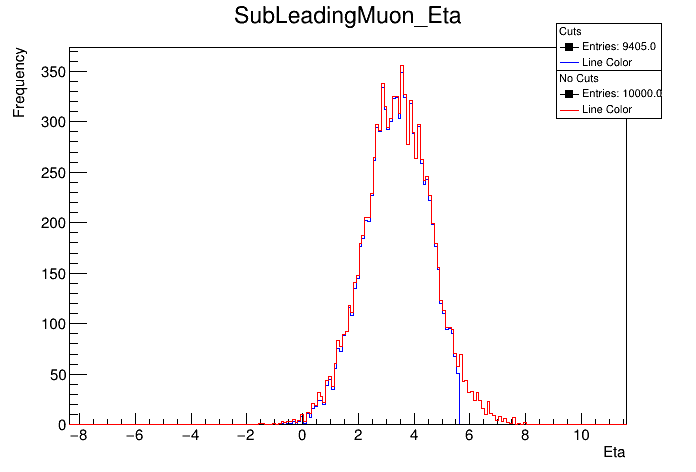

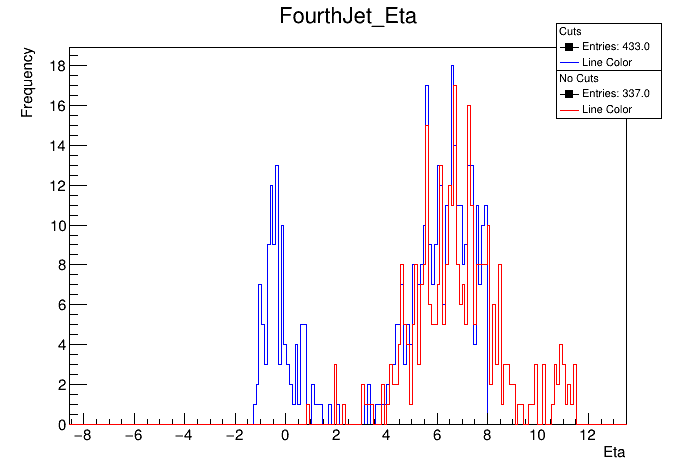

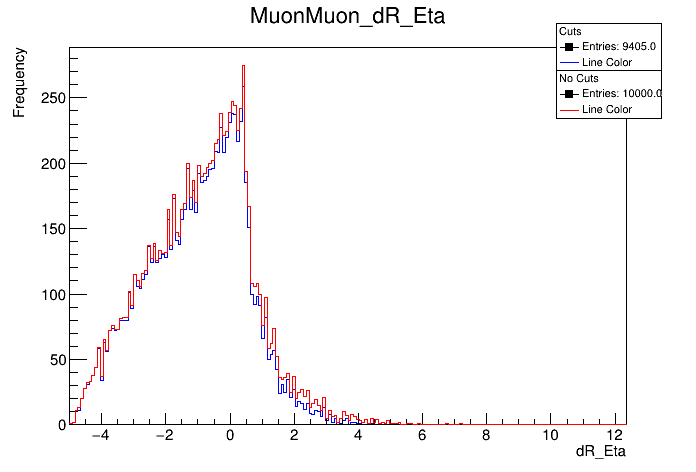

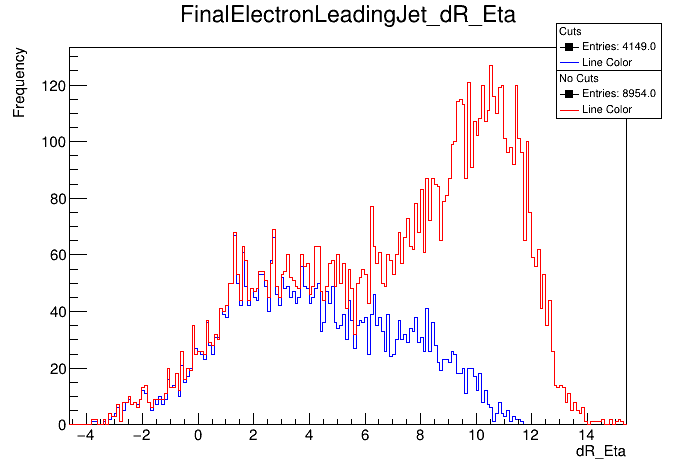

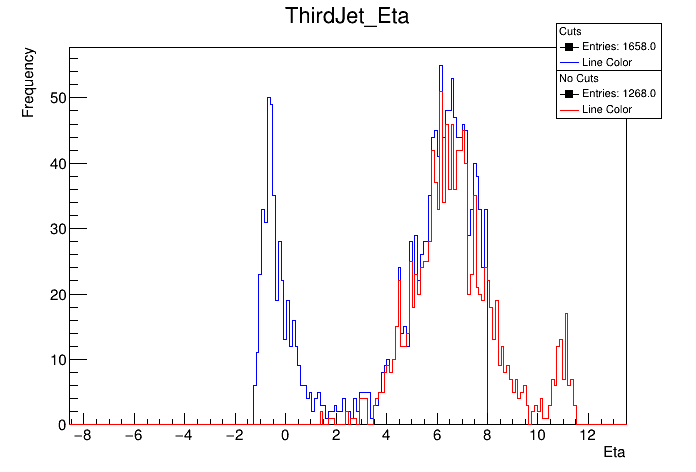

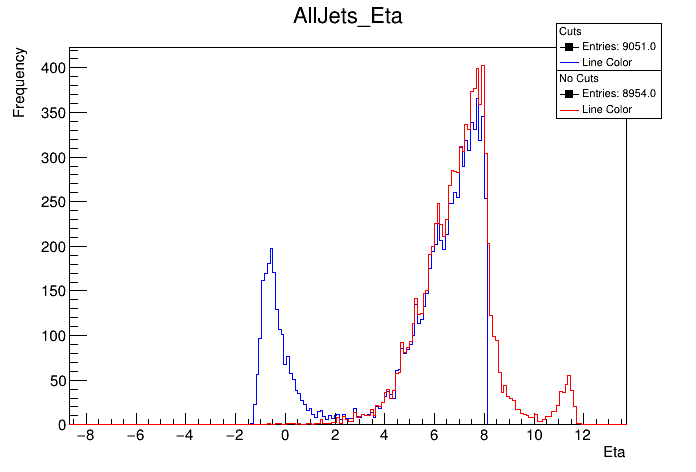

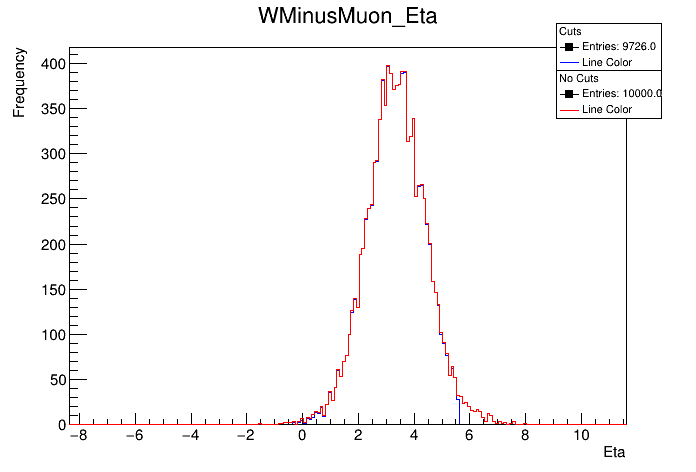

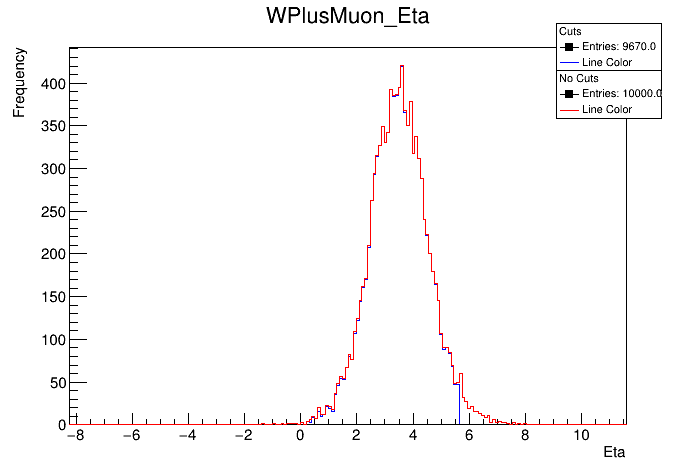

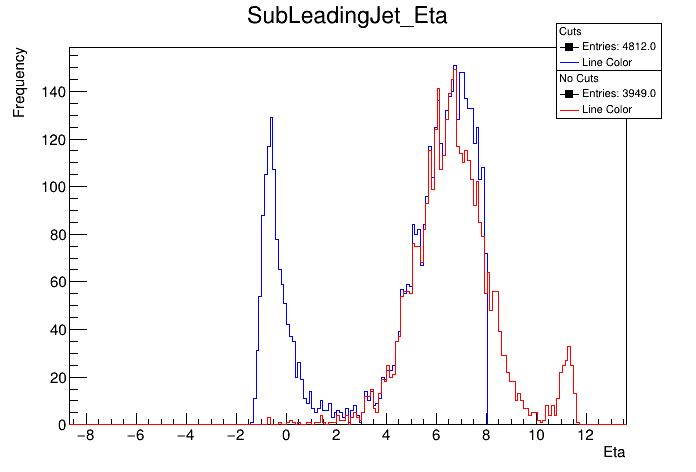

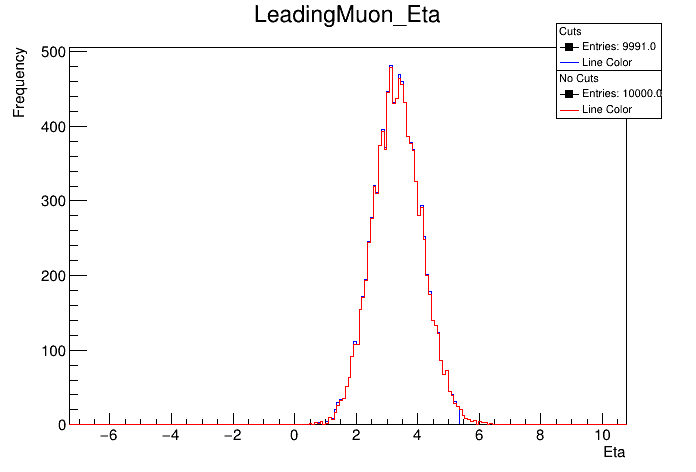

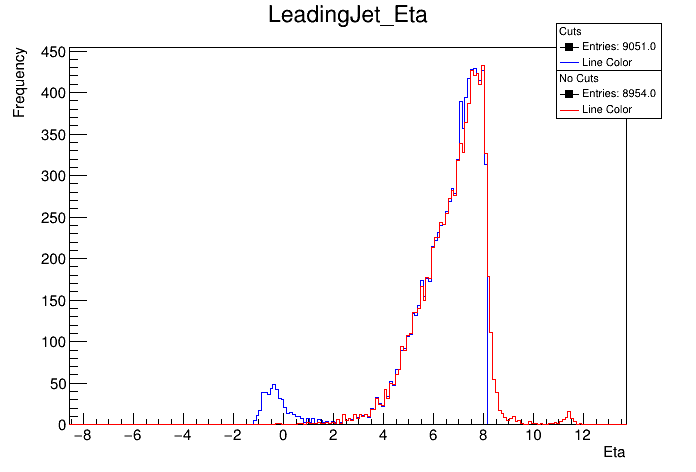

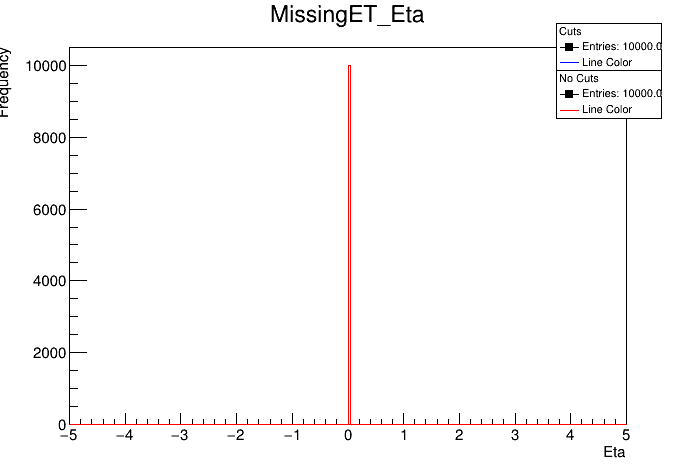

In [86]:
from ROOT import TFile, TH1F, TCanvas, TLegend, SetOwnership

HistFile1_name = 'GenHists_Cuts.root'
HistFile2_name = 'GenHists_NoCuts.root'

HistFile1 = TFile(HistFile1_name)
HistFile2 = TFile(HistFile2_name)

# Hist1.GetListOfKeys() returns an object of type THashList
# key is of type TKey
for key in HistFile1.GetListOfKeys():
    HistCan = TCanvas()
    HistCan.cd()
    
    histname = key.GetName()
    histvar = histname.split('_')[-1]
    Hist1 = HistFile1.Get(histname+';1')
    Hist2 = HistFile2.Get(histname+';1')    

    # xmax and xmin values stored in Hist1 plus/minus 10%
    BinMax1 = Hist1.GetBinLowEdge(Hist1.FindLastBinAbove())
    XMax1 = BinMax1 + abs(BinMax1/20) + 5
    BinMin1 = Hist1.GetBinLowEdge(Hist1.FindFirstBinAbove())
    XMin1 = BinMin1 - abs(BinMin1/20) - 5

    
    # xmax and xmin values stored in Hist2 plus/minus 10%
    BinMax2 = Hist2.GetBinLowEdge(Hist2.FindLastBinAbove())
    XMax2 = BinMax2 + abs(BinMax2/20) + 5
    BinMin2 = Hist2.GetBinLowEdge(Hist2.FindFirstBinAbove())
    XMin2 = BinMin2 - abs(BinMin2/20) - 5

    # max frequency bins
    Max1 = Hist1.GetMaximum() + Hist1.GetMaximum()/20
    Max2 = Hist2.GetMaximum() + Hist2.GetMaximum()/20

    XMax = max(XMax1, XMax2)
    XMin = min(XMin1, XMin2)
    Max = max(Max1, Max2)
    NBins = max(Hist1.GetNbinsX(), Hist2.GetNbinsX())

    # Setting Hist options
    for hist in (Hist1, Hist2):
        # hist.SetAxisRange(Min, Max)
        hist.SetBins(NBins, XMin, XMax)
        hist.SetMaximum(Max)
        hist.SetStats(False)

    Hist1.SetLineColor(4)
    Hist2.SetLineColor(2)
    Hist1.Draw("hist same")
    Hist2.Draw("hist same")
    # HistCan.Update()

    LegendX1 = .8
    LegendX_interval = 0.15
    LegendY1 = .95
    LegendY_interval = 0.1

    Legend1 = TLegend(LegendX1, LegendY1 , LegendX1+LegendX_interval, LegendY1-LegendY_interval)
    SetOwnership(Legend1,False)
    Legend1.SetBorderSize(1)
    Legend1.SetShadowColor(2)
    Legend1.SetHeader("Cuts")
    Legend1.AddEntry("entries","Entries: "+str(int(Hist1.GetEntries())))
    Legend1.AddEntry(Hist1, "Line Color", "l")
    Legend1.SetTextSize(0.025)
    Legend1.SetTextColor(1)
    Legend1.SetEntrySeparation(.1)
    Legend1.Draw("same")

    Legend2 = TLegend(LegendX1, LegendY1-LegendY_interval , LegendX1+LegendX_interval, LegendY1-2*LegendY_interval)
    SetOwnership(Legend2,False)
    Legend2.SetBorderSize(1)
    Legend2.SetShadowColor(2)
    Legend2.SetHeader("No Cuts")
    Legend2.AddEntry("entries","Entries: "+str(int(Hist2.GetEntries())))
    Legend2.AddEntry(Hist2, "Line Color", "l")
    Legend2.SetTextSize(0.025)
    Legend2.SetTextColor(1)
    Legend2.SetEntrySeparation(.1)
    Legend2.Draw("same")

    HistCan.Update()
    if histvar == 'Eta':
        HistCan.Draw()

In [2]:
filename = "tag_1_delphes_events.root"

# Create chain of root trees 
chain = TChain("Delphes")
chain.Add(filename)

# Create object of class ExRootTreeReader
myTree = ExRootTreeReader(chain)
Events = myTree.GetEntries()
Events

10000

In [3]:
# Get pointers to branches used in this analysis
branchEvent = myTree.UseBranch("Event")
branchParticle = myTree.UseBranch("Particle")
# branchElectron = myTree.UseBranch("Electron")
# branchMuon = myTree.UseBranch("Muon")
# branchJet = myTree.UseBranch("Jet")
branchGenJets = myTree.UseBranch("GenJet")
# branchMissingET = myTree.UseBranch("MissingET")

In [5]:
Branch = branchParticle

status = []
event = []
s = 1
status_count = 0
for n in range(Events):

    myTree.ReadEntry(1)

    for i in range(Branch.GetEntries()) :
        particle = Branch.At(i)
        print(particle.P4().E())
    #     if particle.Status == 1 and particle.PID == :


#         print('Event', n, ' Particle ', i, ' PID ', particle.PID, ' Status', particle.Status, 'E', particle.E, 'PT', particle.PT, ' Eta', particle.Eta, ' Phi', particle.Phi)

#         particle1 = particle.P4()
#     elif i == 12:
#         particle2= particle.P4()


# particle1.Eta()


.8433234691619873
0.6080818176269531
28.306005477905273
24.260543823242188
344.62347412109375
653.6593627929688
7000.0
50.0
1231.79345703125
49.99974060058594
1231.79345703125
49.99974060058594
154.67086791992188
456.7423400878906
638.9441528320312
31.435392379760742
95.53154754638672
59.139320373535156
119.50182342529297
337.24053955078125
154.67086791992188
456.7423400878906
31.435392379760742
95.53154754638672
59.139320373535156
119.50182342529297
337.24053955078125
6.61508114910579e-16
638.9441528320312
5768.20703125
6407.15087890625
522.216064453125
45.22819900512695
43.09349060058594
40.02759552001953
28.8011531829834
78.28977966308594
87.57791137695312
241.968017578125
249.14353942871094
631.255126953125
2933.5791015625
1505.9708251953125
260.9432678222656
176.7496337890625
84.5231704711914
40.77679443359375
4.4514055252075195
26.633359909057617
16.46013069152832
9.066638946533203
30.960956573486328
25.723230361938477
52.56654739379883
69.18425750732422
18.393646240234375
97.627

KeyboardInterrupt: 

In [15]:
from ROOT import TMath

def comparison(A, B, Eta=True, Phi=True, Rapidity=True, R_Eta=True, R_Rap=True ):
    '''
    Given two particles will compute dEta, dPhi, dRapidty and two different versions of dR (one using dEta and one using dRapidity)
    A, B = Particle branch
    Eta, Phi, Rapidity, R = what comparisons to compute
    '''
    
    # Default values
    dEta, dPhi, dRapidity, dR_Eta, dR_Rap = 'NA', 'NA', 'NA', 'NA', 'NA'
    Pi = TMath.Pi()
    
    
    if Eta:
        dEta = A.Eta - B.Eta
        
    if Phi:
        dPhi = A.Phi - B.Phi
    
        # Constraining dPhi between -2Pi and 2Pi
        if dPhi < -Pi:
            dPhi = dPhi + 2*Pi
        elif dPhi > Pi:
            dPhi = dPhi - 2*Pi
    
    if Rapidity:
        dRapidity = A.Rapidity - B.Rapidity
    
    if R_Eta and Phi and Eta:
        dR_Eta = (dPhi**2 + dEta**2)**0.5
        
    if R_Rap and Phi and Rapidity:
        dR_Rap = (dPhi**2 + dRapidity**2)**0.5
    
    return (dEta, dPhi, dRapidity, dR_Eta, dR_Rap)